# Importing Libraries

In [1]:
import numpy as np
import pickle
import cv2
import tensorflow as tf
from tensorflow import keras
from os import listdir
from keras.models import Sequential
from keras.layers import  Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.applications.vgg16 import decode_predictions, preprocess_input, VGG16
import csv
import os
import pandas as pd
from PIL import Image

# Exploring Data (EDA)

In [51]:

data_dir = "/Users/umerriaz/Desktop/OEL(2020503)/train"
pixel_values = []
labels = []
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image_file)
            pixel_values.append(image_path)
            labels.append(label)
Image_path = np.array(pixel_values)
labels = np.array(labels)
csv_file = "images_label.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image_path', 'Label']) 
    for i in range(len(pixel_values)):
        writer.writerow([','.join(map(str, Image_path[i])), labels[i]])

print("Data saved to:", csv_file)



Data saved to: images_label.csv


In [3]:
df=pd.read_csv("image_labels.csv")

In [4]:
df

,Image Path,Label
0,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,nls
1,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,nls
2,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,nls
3,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,nls
4,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,nls
...,...,...
781,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,nlb
782,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,nlb
783,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,nlb
784,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,nlb


# Defining Model

In [5]:
from keras.applications.vgg16 import decode_predictions, preprocess_input, VGG16

# Model Implementation

In [6]:
from keras.layers import Dense,Flatten
from keras.models import Sequential
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(256,256,3))
conv_base.trainable=False
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(3, activation="softmax"))

# Plotting Images

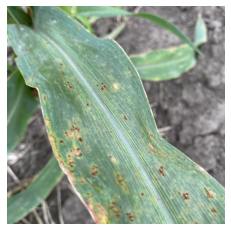

In [7]:
image_path = df['Image Path'].iloc[0]
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  
plt.show()

# Preparing Data for Model (VGG16)

In [8]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [9]:
Encoder=LabelEncoder()


In [10]:
df['Label']=Encoder.fit_transform(df['Label'])

In [11]:
df

,Image Path,Label
0,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,2
1,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,2
2,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,2
3,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,2
4,/Users/umerriaz/Desktop/OEL(2020503)/train/nls...,2
...,...,...
781,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,1
782,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,1
783,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,1
784,/Users/umerriaz/Desktop/OEL(2020503)/train/nlb...,1


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def preprocessImages(image_path):
    image = Image.open(image_path)
    image = image.resize((256, 256))  # Resize the image to (256, 256)
    image = np.array(image) / 255.0
    return image
    

In [14]:
from PIL import Image
import numpy as np

X = []
y = df['Label'].values

for image_path in df['Image Path']:
    image=preprocessImages(image_path)
    X.append(image)

X = np.array(X)

In [15]:
X

array([[[[0.30196078, 0.45098039, 0.2627451 ],
         [0.26666667, 0.40784314, 0.2627451 ],
         [0.23921569, 0.37647059, 0.25490196],
         ...,
         [0.67058824, 0.65490196, 0.6627451 ],
         [0.68235294, 0.6627451 , 0.6745098 ],
         [0.69019608, 0.67058824, 0.68627451]],

        [[0.32941176, 0.4745098 , 0.27843137],
         [0.28235294, 0.42352941, 0.25882353],
         [0.24313725, 0.38039216, 0.24705882],
         ...,
         [0.67058824, 0.65490196, 0.65490196],
         [0.69803922, 0.68235294, 0.69019608],
         [0.69411765, 0.6745098 , 0.69019608]],

        [[0.39215686, 0.53333333, 0.34901961],
         [0.31372549, 0.45490196, 0.27058824],
         [0.2745098 , 0.40784314, 0.25098039],
         ...,
         [0.61176471, 0.59607843, 0.6       ],
         [0.65490196, 0.63921569, 0.64705882],
         [0.68235294, 0.6627451 , 0.67843137]],

        ...,

        [[0.45098039, 0.58823529, 0.50196078],
         [0.43529412, 0.57254902, 0.48627451]

In [16]:
y[0]

2

# Splitting the Data Into Training and Testing Format 

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [18]:
model.compile(loss="categorical_crossentropy",metrics=['Accuracy'],optimizer='adam')

# Summary of The Model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 120)               3932280   
                                                                 
 dense_1 (Dense)             (None, 3)                 363       
                                                                 
Total params: 18647331 (71.13 MB)
Trainable params: 3932643 (15.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [20]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes=3)
Y_test = to_categorical(Y_test, num_classes=3)



In [21]:
Y_train[2]

array([0., 1., 0.], dtype=float32)

# Model Training

In [22]:
# Train the model with the updated target labels
History=model.fit(X_train, Y_train, epochs=5, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/5
20/20 [==============================] - 19s 917ms/step - loss: 2.9929 - Accuracy: 0.4904 - val_loss: 0.5487 - val_Accuracy: 0.7532
Epoch 2/5
20/20 [==============================] - 17s 849ms/step - loss: 0.2882 - Accuracy: 0.9045 - val_loss: 0.3704 - val_Accuracy: 0.8354
Epoch 3/5
20/20 [==============================] - 17s 850ms/step - loss: 0.1388 - Accuracy: 0.9697 - val_loss: 0.3186 - val_Accuracy: 0.8734
Epoch 4/5
20/20 [==============================] - 18s 889ms/step - loss: 0.0785 - Accuracy: 0.9952 - val_loss: 0.2908 - val_Accuracy: 0.9051
Epoch 5/5
20/20 [==============================] - 17s 860ms/step - loss: 0.0505 - Accuracy: 1.0000 - val_loss: 0.2516 - val_Accuracy: 0.9114


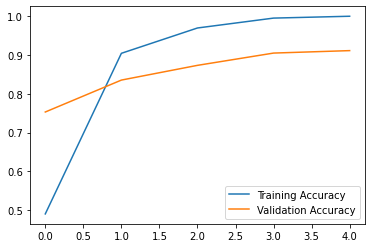

In [23]:
plt.plot(History.history['Accuracy'],label="Training Accuracy")
plt.plot(History.history['val_Accuracy'],label="Validation Accuracy")
plt.legend()
plt.show()

# Saving The Model

In [24]:
model.save('my_model.h5')

/opt/anaconda3/envs/mlp/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Evaluation

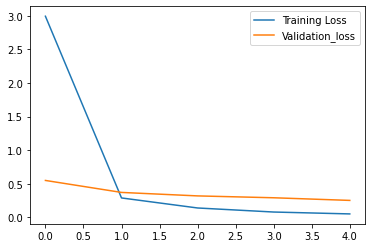

In [25]:
plt.plot(History.history['loss'],label="Training Loss")
plt.plot(History.history['val_loss'],label="Validation_loss")
plt.legend()
plt.show()

In [26]:
ls

TransferLearning.ipynb  image_pixel_values.csv  my_model.h5
image_labels.csv        images_label.csv        train/


In [27]:
model=keras.models.load_model('my_model.h5')

In [30]:

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

5/5 [==============================] - 3s 738ms/step


In [31]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [32]:
predicted_labels

array([1, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0,
       1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0,
       2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 2, 2])

In [36]:
Y_pred = tf.keras.utils.to_categorical(predicted_labels, num_classes=3)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Accuracy: 0.9113924050632911
Precision: 0.9132507849559225
Recall: 0.9113924050632911
F1-score: 0.9119472161580876


1/1 [==============================] - 0s 58ms/step


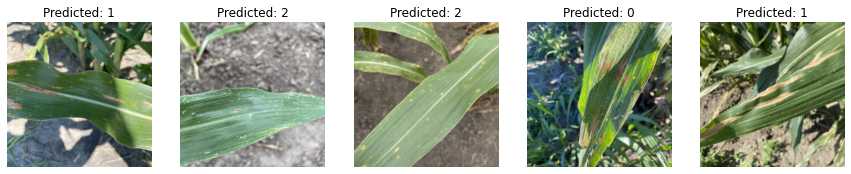

In [48]:
sample_images = X_test[10:15]
sample_predictions = model.predict(sample_images)
sample_predicted_labels = np.argmax(sample_predictions, axis=1)

plt.figure(figsize=(15, 7))
for i in range(len(sample_images)):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f'Predicted: {sample_predicted_labels[i]}')
    plt.axis('off')
plt.show()